# Audio File Classification

## 1) Imports

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, Activation

import pandas as pd
import numpy as np

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
print(f'length: {len(df)}')
df.head()

length: 98


,Filename,Class,Duration
0,Dataset\cat_99.wav,cat,12.000000
1,Dataset\cat_34.wav,cat,8.748027
2,Dataset\cat_132.wav,cat,15.192018
3,Dataset\cat_90.wav,cat,12.216009
4,Dataset\cat_101.wav,cat,11.500000


## 2) Melspectrogram

In [3]:
import librosa
import librosa.display

shape: (128, 128)


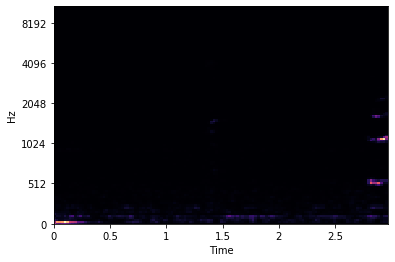

In [4]:
y, sr = librosa.load(df.iloc[11,0], duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
print(f'shape: {ps.shape}')
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [5]:
def toMel(filenames, ids):
    Dataset = []
    for file,ids in zip(filenames,ids):
        y, sr = librosa.load(file,duration=2.97)
        ps = librosa.feature.melspectrogram(y=y, sr=sr)
        if ps.shape != (128, 128): continue
        Dataset.append((ps,ids))
    return Dataset

In [6]:
Dataset = toMel(df.Filename, df.Class)

## 3) Training and evaluation

In [7]:
import random

random.shuffle(Dataset)

In [8]:
train, test = Dataset[:79],Dataset[79:]

In [9]:
X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

In [10]:
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le1 = LabelEncoder()
le2 = LabelEncoder()

y_train = le1.fit_transform(y_train)
y_test = le2.fit_transform(y_test)

In [13]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [14]:
model.compile(
    optimizer="Adam",
    loss="binary_crossentropy",
    metrics=['accuracy']
)

model.fit(
    x=X_train, 
    y=y_train,
    epochs=100,
    batch_size=64,
    validation_data= (X_test, y_test)
)

Train on 79 samples, validate on 19 samples
Epoch 1/100
79/79 [==============================] - 1s 19ms/sample - loss: 3.0342 - accuracy: 0.6076 - val_loss: 10.2901 - val_accuracy: 0.8421
Epoch 2/100
79/79 [==============================] - 0s 6ms/sample - loss: 6.1787 - accuracy: 0.6329 - val_loss: 8.2939 - val_accuracy: 0.8421
Epoch 3/100
79/79 [==============================] - 0s 6ms/sample - loss: 4.1797 - accuracy: 0.5823 - val_loss: 8.0618 - val_accuracy: 0.8421
Epoch 4/100
79/79 [==============================] - 0s 6ms/sample - loss: 6.9009 - accuracy: 0.6962 - val_loss: 4.9751 - val_accuracy: 0.8421
Epoch 5/100
79/79 [==============================] - 0s 6ms/sample - loss: 2.5913 - accuracy: 0.7215 - val_loss: 3.9699 - val_accuracy: 0.8421
Epoch 6/100
79/79 [==============================] - 0s 6ms/sample - loss: 3.6095 - accuracy: 0.6076 - val_loss: 3.0706 - val_accuracy: 0.8421
Epoch 7/100
79/79 [==============================] - 0s 6ms/sample - loss: 4.9352 - accuracy: 0.

79/79 [==============================] - 0s 6ms/sample - loss: 0.7234 - accuracy: 0.7722 - val_loss: 0.3376 - val_accuracy: 0.8421
Epoch 58/100
79/79 [==============================] - 0s 6ms/sample - loss: 0.4842 - accuracy: 0.7848 - val_loss: 0.3504 - val_accuracy: 0.8421
Epoch 59/100
79/79 [==============================] - 0s 6ms/sample - loss: 0.5138 - accuracy: 0.7848 - val_loss: 0.3812 - val_accuracy: 0.8421
Epoch 60/100
79/79 [==============================] - 0s 6ms/sample - loss: 0.6368 - accuracy: 0.7975 - val_loss: 0.4152 - val_accuracy: 0.8421
Epoch 61/100
79/79 [==============================] - 0s 6ms/sample - loss: 0.4982 - accuracy: 0.8101 - val_loss: 0.4385 - val_accuracy: 0.8421
Epoch 62/100
79/79 [==============================] - 0s 6ms/sample - loss: 0.4571 - accuracy: 0.7848 - val_loss: 0.4580 - val_accuracy: 0.8421
Epoch 63/100
79/79 [==============================] - 0s 6ms/sample - loss: 0.4642 - accuracy: 0.8228 - val_loss: 0.4588 - val_accuracy: 0.8421
Epoch

In [15]:
score = model.evaluate(
    x=X_test,
    y=y_test
)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

19/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 4ms/sample - loss: 0.2177 - accuracy: 0.8421
Test loss: 0.2176636904478073
Test accuracy: 0.84210527


## 4) Testing

In [16]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Filename,Class,Duration
0,Dataset\cat_22.wav,cat,10.300000
1,Dataset\cat_116.wav,cat,11.900000
2,Dataset\cat_155.wav,cat,1.944036
3,Dataset\cat_58.wav,cat,12.000000
4,Dataset\cat_77.wav,cat,3.044036


In [17]:
Test_Dataset = toMel(test_df.Filename, test_df.Class)

In [18]:
Test_Dataset[0]

(array([[8.5615348e-03, 2.9255063e-03, 5.6663819e-04, ..., 2.0850975e-04,
         2.1397219e-04, 1.1270854e-03],
        [1.5062341e-01, 4.8814062e-02, 1.6571373e-02, ..., 1.6595665e-03,
         2.1096056e-03, 2.0910108e-03],
        [3.7686762e-01, 1.4975561e-01, 8.0373459e-02, ..., 1.4409575e-02,
         1.3993740e-02, 5.9837569e-03],
        ...,
        [1.4456814e-06, 3.6141904e-07, 2.4635609e-16, ..., 3.7424969e-15,
         1.6933336e-09, 1.9017061e-05],
        [1.4112386e-06, 3.5280846e-07, 2.3764020e-16, ..., 4.1564330e-15,
         1.6657444e-09, 1.8706714e-05],
        [1.3896436e-06, 3.4740958e-07, 3.1436998e-16, ..., 2.8536434e-15,
         1.6482450e-09, 1.8509874e-05]], dtype=float32),
 'cat')

In [19]:
random.shuffle(Test_Dataset)

In [20]:
X_feat, y_actual = zip(*Test_Dataset)

In [21]:
X_feat = np.array([x.reshape( (128, 128, 1) ) for x in X_feat])

In [22]:
le3 = LabelEncoder()
y_actual = le3.fit_transform(y_actual)

In [23]:
new_score = model.evaluate(
    x=X_feat,
    y=y_actual
)

print('loss:', new_score[0])
print('accuracy:', new_score[1])

69/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================